# Content-Based Recommendation Engine

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [2]:
#read data
chart_tracks_df=pd.read_csv("data/spotify_daily_charts_tracks_predicted_genres.csv")
#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_pop_prob,predicted_rap_prob,predicted_rnb_prob,predicted_rock_prob
0,4VuS959DSpr82t3qBqCrWG,Supermarket Flowers,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,221106,2017-03-03,78,0.589,0.242,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1Qi2wh8fFgDV7tl4Sj3f2K,Have Yourself A Merry Little Christmas,2wY79sveU1sp5g7SokKOiI,Sam Smith,3nCpXy6LlyXWuFR08tMycK,170964,2014-12-05,58,0.438,0.178,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,66y7x28jXOPrcmu3D5Zjh6,A Million Dreams (Reprise),6Y20PijIkUoCtuvtkz37dO,Austyn Johnson,7ayBZIe1FHkNv0T5xFCX6F,60453,2017-12-08,67,0.253,0.139,...,classical,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14BG5B1EJSCyNpZt096xXc,"Patawad, Paalam",0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,4Lavp71TTVIdkw8yNY8LhA,323140,2019-06-14,59,0.472,0.288,...,jazz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1iSZPndzmY6NvL1jAtIvY1,I'm Upset,3TVXtAsR1Inumwj472S9r4,Drake,2o9McLtDM7mbODV7yZF2mc,214466,2018-06-29,0,0.899,0.587,...,rap,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
chart_tracks_df.shape

(2292, 30)

## 2. Input Seed Track


In [4]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [5]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='The Scientist'].iloc[0]
seed_track_data[feature_cols]

danceability        0.560000
energy              0.442000
loudness            0.697073
speechiness         0.024300
acousticness        0.727000
instrumentalness    0.000017
liveness            0.110000
valence             0.212000
tempo               0.606027
Name: 547, dtype: object

## 3. Explore Similarity Measures

In [6]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


##### Use audio features only

Euclidean

In [7]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1581,Dear my friend (feat. Kim Jong Wan of NELL),Agust D,0.000,country,0.560,0.735,0.733101,0.0638,0.01810,0.000009,0.0571,0.2700,0.616214
1931,A Thousand Miles,Vanessa Carlton,0.000,country,0.560,0.825,0.834719,0.0379,0.32300,0.000000,0.1610,0.2680,0.273453
1042,Only The Young - Featured in Miss Americana,Taylor Swift,0.000,country,0.560,0.780,0.792426,0.0517,0.00244,0.000000,0.0714,0.6020,0.264319
147,Eastside (with Halsey & Khalid),benny blanco,0.000,jazz,0.560,0.680,0.679713,0.3210,0.55500,0.000000,0.1160,0.3190,0.237689
65,Make You Feel My Love,Adele,0.001,jazz,0.559,0.172,0.557380,0.0291,0.90700,0.000383,0.1050,0.0955,0.157859
1963,You're Still The One,Shania Twain,0.001,rnb,0.561,0.539,0.703582,0.0308,0.47800,0.000000,0.2680,0.6380,0.524577
1231,Boo'd Up,Ella Mai,0.001,pop,0.561,0.779,0.783746,0.0531,0.08620,0.000000,0.0780,0.2350,0.189750
1107,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,0.001,rock,0.559,0.491,0.730563,0.0346,0.05670,0.000000,0.0992,0.1140,0.649170
1794,A Thousand Miles,Vanessa Carlton,0.001,country,0.559,0.845,0.834350,0.0379,0.22200,0.000000,0.1640,0.3040,0.273350
218,illicit affairs,Taylor Swift,0.001,jazz,0.559,0.310,0.565200,0.0338,0.88100,0.000000,0.1060,0.4600,0.434288


Manhattan

In [8]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1581,Dear my friend (feat. Kim Jong Wan of NELL),Agust D,0.000,country,0.560,0.735,0.733101,0.0638,0.01810,0.000009,0.0571,0.270,0.616214
1931,A Thousand Miles,Vanessa Carlton,0.000,country,0.560,0.825,0.834719,0.0379,0.32300,0.000000,0.1610,0.268,0.273453
147,Eastside (with Halsey & Khalid),benny blanco,0.000,jazz,0.560,0.680,0.679713,0.3210,0.55500,0.000000,0.1160,0.319,0.237689
1042,Only The Young - Featured in Miss Americana,Taylor Swift,0.000,country,0.560,0.780,0.792426,0.0517,0.00244,0.000000,0.0714,0.602,0.264319
274,Malibu Nights,LANY,0.001,rock,0.559,0.422,0.506039,0.1950,0.70100,0.000002,0.0853,0.191,0.138344
218,illicit affairs,Taylor Swift,0.001,jazz,0.559,0.310,0.565200,0.0338,0.88100,0.000000,0.1060,0.460,0.434288
1963,You're Still The One,Shania Twain,0.001,rnb,0.561,0.539,0.703582,0.0308,0.47800,0.000000,0.2680,0.638,0.524577
1231,Boo'd Up,Ella Mai,0.001,pop,0.561,0.779,0.783746,0.0531,0.08620,0.000000,0.0780,0.235,0.189750
2130,Hope Not,BLACKPINK,0.001,jazz,0.561,0.422,0.788209,0.0267,0.44400,0.000000,0.0867,0.182,0.370972
2112,Hope Not,BLACKPINK,0.001,jazz,0.561,0.422,0.788209,0.0267,0.44400,0.000000,0.0867,0.182,0.370972


Cosine

In [9]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1395,Isang Araw,Kaye Cal,0.002299,rock,0.466,0.342,0.657482,0.0300,0.613,0.000000,0.1240,0.210,0.536100
958,Imahe,Magnus Haven,0.002810,pop,0.604,0.446,0.664893,0.0341,0.630,0.000000,0.0859,0.199,0.589875
1311,Kung Wala Ka,Hale,0.003400,pop,0.500,0.339,0.693920,0.0263,0.710,0.002220,0.1080,0.152,0.541335
1280,Let Me Be the One,Julie Anne San Jose,0.004728,rock,0.587,0.396,0.635742,0.0399,0.643,0.000000,0.1060,0.207,0.460292
202,ocean eyes,Billie Eilish,0.005340,pop,0.511,0.363,0.679632,0.0410,0.816,0.031700,0.0840,0.169,0.595982
534,Tilaluha,SB19,0.005681,pop,0.463,0.456,0.712549,0.0279,0.826,0.000102,0.1440,0.218,0.562697
1920,Daylight,Taylor Swift,0.005828,jazz,0.557,0.496,0.599713,0.0563,0.808,0.000173,0.0772,0.265,0.628848
1534,I'll Never Go,Erik Santos,0.006096,jazz,0.444,0.327,0.531627,0.0334,0.684,0.000000,0.0839,0.240,0.561812
1396,Pusong Ligaw,Jericho Rosales,0.006777,rock,0.608,0.417,0.569458,0.0276,0.645,0.000007,0.1280,0.142,0.486779
1198,Hanggang Kailan (Umuwi Ka Na Baby),Angelina Cruz,0.006907,pop,0.590,0.407,0.621126,0.0361,0.861,0.000010,0.0940,0.276,0.602179


View histograms of the 3 similarity measures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4162ed62e0>,
      dtype=object)

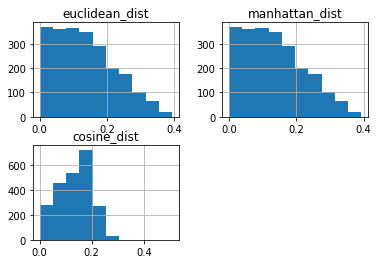

In [10]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [ ]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

###### Audio features and genre probabilities

In [ ]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

## Day Deliverable

*Groupwork*
1. Explore different seed tracks configurations:
    - A single track
    - A *representative track* made by aggregating the audio features and genre probabilities of all tracks in a chosen album/genre
    - A *hypothetical track* with specified desired audio feature values
    
    
2. For each choice of seed track in (1), repeat notebook Steps 2-4 and discuss if the recommended tracks make sense. As a user, would you listen to the recommended tracks?

3. In addition to (2), check if the top 10 tracks with the **worst** similarity measure (i.e. most dissimilar to the seed track) make sense. As a user, do you agree that these are the tracks to be first discarded from the recommendation pool?
